In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
df_true = pd.read_csv('datasets/toyDetector_5k_20_25_2.csv')
df_true = df_true[df_true.layer==0]
df_true

,index,x,y,layer,weight,rho,delta,nh,isSeed,clusterId
0,0,-125.62,-19.29,0,1,26.0,0.662118,3953,0,206
1,1,-125.55,-15.88,0,1,27.5,16.566900,3940,0,206
2,2,-124.31,-19.01,0,1,25.5,0.381187,3957,0,206
3,3,-129.71,-20.03,0,1,26.5,1.647790,5,0,206
4,4,-125.19,-17.73,0,1,26.5,1.231790,3958,0,206
...,...,...,...,...,...,...,...,...,...,...
4995,4995,219.80,-98.78,0,1,17.5,31.438100,2485,0,44
4996,4996,-91.30,-203.86,0,1,1.5,7.883360,4964,0,846
4997,4997,211.69,26.87,0,1,20.0,13.403800,4782,0,392
4998,4998,120.60,-175.63,0,1,9.0,12.042100,3233,0,361


In [3]:
df_true.columns

Index(['index', 'x', 'y', 'layer', 'weight', 'rho', 'delta', 'nh', 'isSeed',
       'clusterId'],
      dtype='object')

In [4]:
isSeed = df_true.apply(lambda x: x['isSeed']>0 and x['nh']>=0, axis=1) 

# sn.scatterplot(df_true.x, df_true.y, isSeed)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

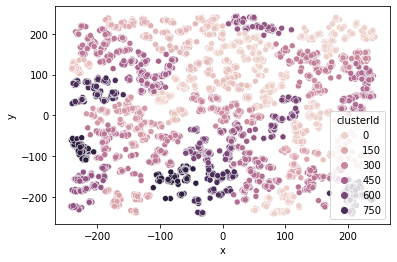

In [5]:
sn.scatterplot(df_true.x, df_true.y, df_true.clusterId)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

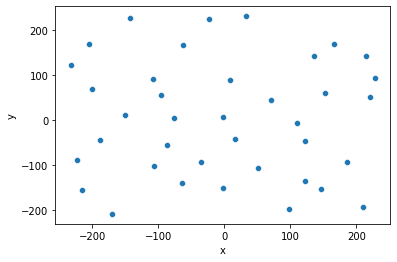

In [6]:
df_seed = df_true[df_true.isSeed>0]
sn.scatterplot(df_seed.x, df_seed.y)

6 seeds, cluster looks accurate


In [30]:
df_fast = pd.read_csv('D1_fast.csv')
df_fast.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,10.0,0.0,0.0,7.229115
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,6.0,0.0,0.0,1.888280
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,10.0,0.0,0.0,3.497571
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,10.0,0.0,0.0,0.404969
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,10.0,0.0,0.0,2.760072


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

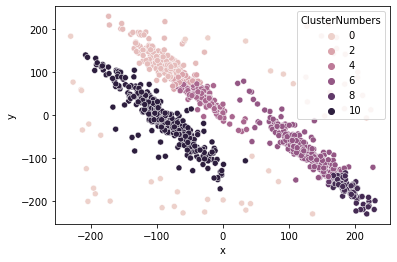

In [31]:
sn.scatterplot(df_fast.x, df_fast.y, df_fast.ClusterNumbers)

In [26]:
df = pd.read_csv('D1.csv')
df.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,10.0,0.0,0.0,7.229115
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,6.0,0.0,0.0,1.888280
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,10.0,0.0,0.0,3.497571
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,10.0,0.0,0.0,0.404969
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,10.0,0.0,0.0,2.760072


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

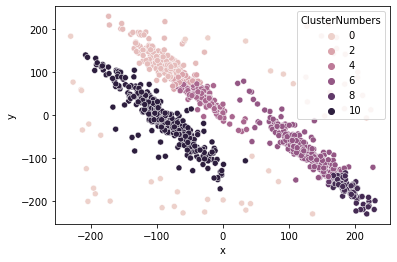

In [34]:
sn.scatterplot(df.x, df.y, df.ClusterNumbers)

In [36]:
df[df['isSeed']==1]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
51,51,-84.64,113.85,0.0,1.0,32.5,inf,1.0,0.0,1.0,999.000000
168,168,-54.23,79.47,0.0,1.0,32.0,inf,2.0,0.0,1.0,999.000000
175,175,164.00,-135.47,0.0,1.0,28.0,778.0,6.0,0.0,1.0,35.449417
205,205,-69.63,-36.63,0.0,1.0,29.5,800.0,10.0,0.0,1.0,38.039891
212,212,-55.87,76.23,0.0,1.0,32.0,inf,5.0,0.0,1.0,999.000000
214,214,135.46,-95.24,0.0,1.0,32.5,inf,6.0,0.0,1.0,999.000000
375,375,-70.27,-28.62,0.0,1.0,29.5,800.0,10.0,0.0,1.0,32.008327
608,608,167.18,-144.11,0.0,1.0,28.0,inf,8.0,0.0,1.0,999.000000
694,694,169.16,-143.03,0.0,1.0,28.0,inf,9.0,0.0,1.0,999.000000
972,972,-102.79,4.48,0.0,1.0,32.0,inf,10.0,0.0,1.0,999.000000


In [37]:
df_fast[df_fast['isSeed']==1]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
51,51,-84.64,113.85,0.0,1.0,32.5,-9.223372e+18,1.0,0.0,1.0,999.000000
168,168,-54.23,79.47,0.0,1.0,32.0,-9.223372e+18,2.0,0.0,1.0,999.000000
175,175,164.00,-135.47,0.0,1.0,28.0,7.780000e+02,6.0,0.0,1.0,35.449417
205,205,-69.63,-36.63,0.0,1.0,29.5,8.000000e+02,10.0,0.0,1.0,38.039891
212,212,-55.87,76.23,0.0,1.0,32.0,-9.223372e+18,5.0,0.0,1.0,999.000000
214,214,135.46,-95.24,0.0,1.0,32.5,-9.223372e+18,6.0,0.0,1.0,999.000000
375,375,-70.27,-28.62,0.0,1.0,29.5,8.000000e+02,10.0,0.0,1.0,32.008327
608,608,167.18,-144.11,0.0,1.0,28.0,-9.223372e+18,8.0,0.0,1.0,999.000000
694,694,169.16,-143.03,0.0,1.0,28.0,-9.223372e+18,9.0,0.0,1.0,999.000000
972,972,-102.79,4.48,0.0,1.0,32.0,-9.223372e+18,10.0,0.0,1.0,999.000000


In [33]:
(df['ClusterNumbers'] == df_fast['ClusterNumbers']).count()

1000

In [29]:
df_seeds = pd.read_csv('datasets/dataset1_toy.csv')
df_seeds.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-125.62,-19.29,0.0,1.0,26.0,3337.0,9.0,0.0,0.0,1.618178
1,1,-14.75,-181.03,0.0,1.0,11.0,10.0,18.0,0.0,0.0,0.554437
2,2,-17.62,-182.86,0.0,1.0,10.0,7.0,18.0,0.0,0.0,1.618054
3,3,-14.09,-182.71,0.0,1.0,12.0,4110.0,18.0,0.0,0.0,13.156002
4,4,-19.80,-184.55,0.0,1.0,9.5,2.0,18.0,0.0,0.0,2.758351


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

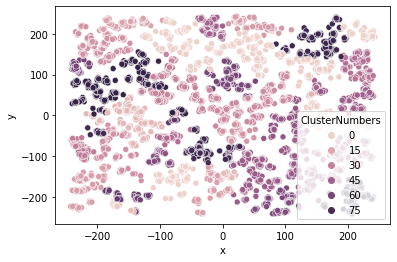

In [11]:
sn.scatterplot(df.x, df.y, df.ClusterNumbers)

In [12]:
df_no_outliers = df[df['isOutlier']==0]

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

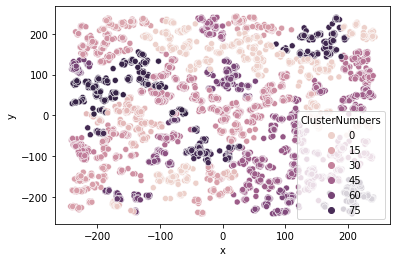

In [13]:
sn.scatterplot(df_no_outliers.x, df_no_outliers.y, df_no_outliers.ClusterNumbers)

In [14]:
df_outliers = df[df['ClusterNumbers']==0]

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

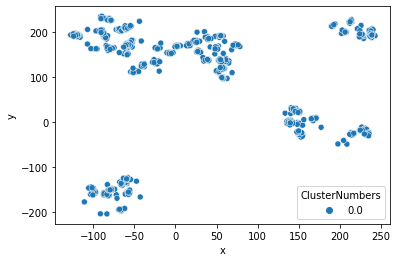

In [15]:
sn.scatterplot(df_outliers.x, df_outliers.y, df_outliers.ClusterNumbers)

/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

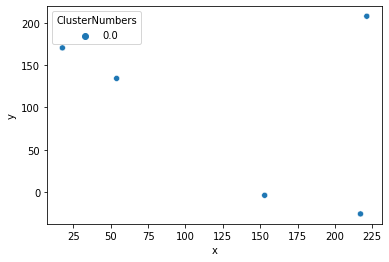

In [16]:
df_outliers = df[df['isOutlier']==1]
sn.scatterplot(df_outliers.x, df_outliers.y, df_outliers.ClusterNumbers)

In [17]:
df_clusters = df[df['ClusterNumbers']!=0]


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

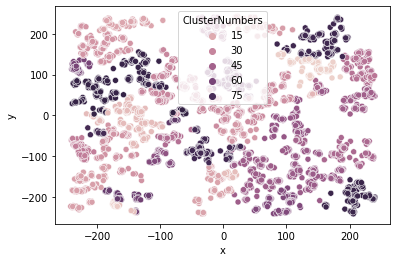

In [18]:
sn.scatterplot(df_clusters.x, df_clusters.y, df_clusters.ClusterNumbers)

In [19]:
df['ClusterNumbers'].value_counts()

0.0     635
9.0     238
29.0    214
48.0    213
27.0    211
       ... 
4.0       1
5.0       1
6.0       1
14.0      1
64.0      1
Name: ClusterNumbers, Length: 74, dtype: int64

In [20]:
df['isOutlier'].value_counts()

0.0    4995
1.0       5
Name: isOutlier, dtype: int64

In [21]:
df[df_true['isSeed']==1]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
79,79,236.27,203.96,0.0,1.0,17.5,1807.0,0.0,0.0,0.0,11.824728
176,176,-222.07,39.10,0.0,1.0,10.0,191.0,81.0,0.0,0.0,1.693871
283,283,198.30,110.41,0.0,1.0,11.5,285.0,37.0,0.0,0.0,2.639470
291,291,66.92,-174.69,0.0,1.0,17.0,179.0,47.0,0.0,0.0,3.291519
629,629,205.21,-176.61,0.0,1.0,34.5,1822.0,79.0,0.0,0.0,9.463033
703,703,-65.84,202.04,0.0,1.0,16.5,705.0,0.0,0.0,0.0,2.359682
898,898,146.48,149.65,0.0,1.0,25.0,924.0,78.0,0.0,0.0,0.982344
1090,1090,229.17,75.91,0.0,1.0,23.0,1085.0,37.0,0.0,0.0,2.339850
1280,1280,42.90,240.85,0.0,1.0,12.0,1272.0,20.0,0.0,0.0,3.801276
1324,1324,-188.91,-147.13,0.0,1.0,10.5,1310.0,19.0,0.0,0.0,1.683241


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

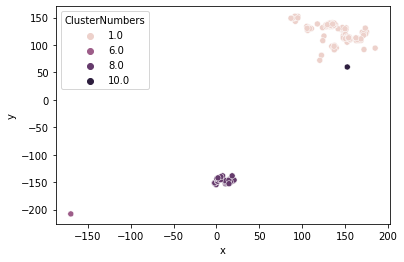

In [22]:
sn.scatterplot(df[df['ClusterNumbers'].isin([10,6,1,8])].x, df[df['ClusterNumbers'].isin([10,6,1,8])].y, df[df['ClusterNumbers'].isin([10,6,1,8])].ClusterNumbers)

In [23]:
df['ClusterNumbers'] == [4,8]

ValueError: ('Lengths must match to compare', (5000,), (2,))

In [40]:
df_true = pd.read_csv('datasets/toyDetector_5k_20_25_2.csv')
df_true = df_true[df_true.layer==0]
df_true

,index,x,y,layer,weight,rho,delta,nh,isSeed,clusterId
0,0,-125.62,-19.29,0,1,26.0,0.662118,3953,0,206
1,1,-125.55,-15.88,0,1,27.5,16.566900,3940,0,206
2,2,-124.31,-19.01,0,1,25.5,0.381187,3957,0,206
3,3,-129.71,-20.03,0,1,26.5,1.647790,5,0,206
4,4,-125.19,-17.73,0,1,26.5,1.231790,3958,0,206
...,...,...,...,...,...,...,...,...,...,...
4995,4995,219.80,-98.78,0,1,17.5,31.438100,2485,0,44
4996,4996,-91.30,-203.86,0,1,1.5,7.883360,4964,0,846
4997,4997,211.69,26.87,0,1,20.0,13.403800,4782,0,392
4998,4998,120.60,-175.63,0,1,9.0,12.042100,3233,0,361


/home/dhruv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

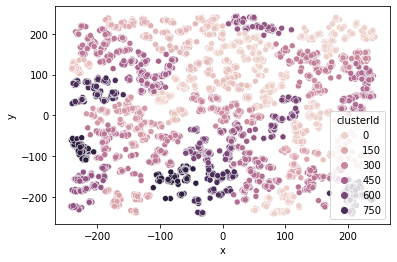

In [41]:
sn.scatterplot(df_true.x, df_true.y, df_true.clusterId)

In [5]:
df = pd.read_csv('datasets/dataset1.csv')
df.head()

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
0,0,-51.86,-64.09,0.0,1.0,16.0,147.0,0.0,0.0,0.0,7.229115
1,1,98.02,-43.68,0.0,1.0,16.5,572.0,0.0,0.0,0.0,1.888280
2,2,-66.32,-35.50,0.0,1.0,27.5,205.0,0.0,0.0,0.0,3.497571
3,3,-52.16,-34.61,0.0,1.0,18.5,199.0,0.0,0.0,0.0,0.404969
4,4,-82.97,-17.03,0.0,1.0,25.5,541.0,0.0,0.0,0.0,2.760072


In [14]:
df[df['isSeed']==1]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta
101,694,169.16,-143.03,0.0,1.0,28.0,inf,9.0,0.0,1.0,999.000000
203,608,167.18,-144.11,0.0,1.0,28.0,inf,8.0,0.0,1.0,999.000000
316,972,-102.79,4.48,0.0,1.0,32.0,inf,10.0,0.0,1.0,999.000000
513,168,-54.23,79.47,0.0,1.0,32.0,inf,2.0,0.0,1.0,999.000000
520,175,164.00,-135.47,0.0,1.0,28.0,778.0,3.0,0.0,1.0,35.449417
612,205,-69.63,-36.63,0.0,1.0,29.5,800.0,4.0,0.0,1.0,38.039891
619,212,-55.87,76.23,0.0,1.0,32.0,inf,5.0,0.0,1.0,999.000000
621,214,135.46,-95.24,0.0,1.0,32.5,inf,6.0,0.0,1.0,999.000000
646,51,-84.64,113.85,0.0,1.0,32.5,inf,1.0,0.0,1.0,999.000000
767,375,-70.27,-28.62,0.0,1.0,29.5,800.0,7.0,0.0,1.0,32.008327


In [15]:
df[df['NH']==101]

,Unnamed: 0,x,y,layer,weight,rho,NH,ClusterNumbers,isOutlier,isSeed,delta


In [12]:
chosen_layer = 0
sortpar = 'weight'
df = df[df['layer']==chosen_layer].sort_values(sortpar, ascending=False, ignore_index=True)